# Analyse network connectivity

This example analyses the network connectivity created by ```simple_network_creation.ipynb```, please run that first to create the required network files. 

### Make sure HDF5 files are closed before running
Make sure to shut down the kernel in the other notebook after running the network creation, otherwise you might get the error: 

```Unable to open file (file is already open for write (may use <h5clear file> to clear file consistency flags))```

If you get the above error, try using ```h5clear -s networks/simple_example/network-synapses.hdf5``` in the terminal window.

In [1]:
import os
from snudda.analyse.analyse import SnuddaAnalyse

network_file = os.path.join("networks","simple_example","network-synapses.hdf5")
dist3D = False
y_max_H = None

sa = SnuddaAnalyse(network_file)

Assuming volume type: cube [cube or full]
Only using 20000 neurons of the connection data
Creating figures directory networks/simple_example/figures
Number of neurons: 200
Synapse row 0 - 0.0 % time: 0.0024686349970579613 seconds
Created connection matrix 0.025549639998644125 seconds
Created gap junction connection matrix 9.774999853107147e-05 seconds
Creating population dictionary
Done.
!!! Setting sideLen to None
Calculating synapse distance histogram
Creating dist histogram
n_synapses = 25771, at 0
Created distance histogram (optimised) in 0.025725014998897677 seconds
Saving cache to networks/simple_example/network-synapses.hdf5-cache


This plots a histogram showing how many iSPN neurons connect to each dSPN neuron.

Calculating number of incoming connections iSPN -> dSPN
Centering in None : Keeping 100/100
#pre = 100, #post = 100


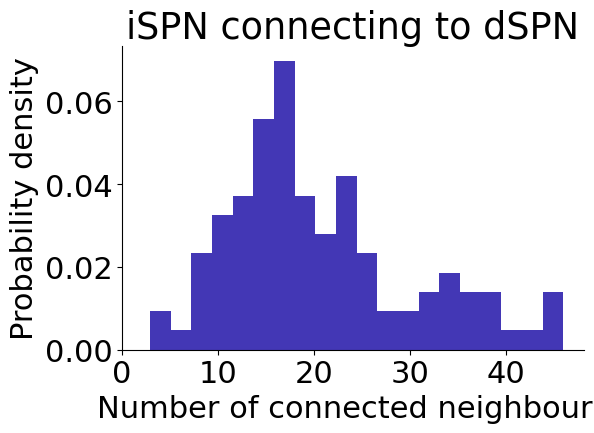

Wrote networks/simple_example/figures/Network-synapses-input-to-dSPN-from-iSPN.png


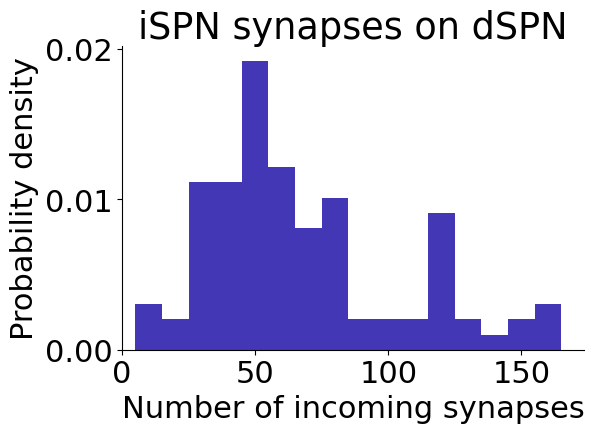

Wrote networks/simple_example/figures/Network-synapses-to-dSPN-from-iSPN.png


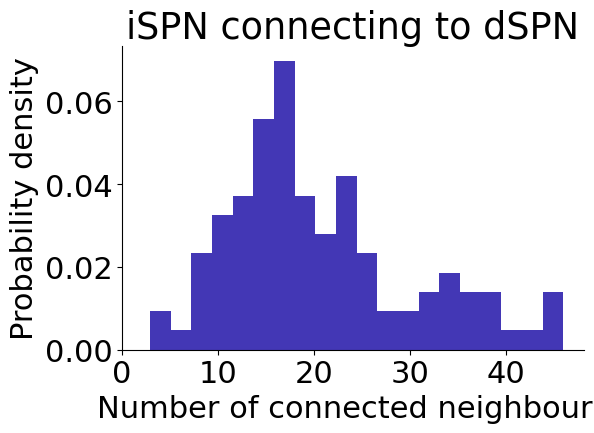

In [2]:
sa.plot_incoming_connections(neuron_type="dSPN", pre_type="iSPN", num_bins=20)

This shows the iSPN to dSPN connection probability, as a function of distance. Since this example network is contained in a small cube, we can only look at the most proximal connections. The dist_3d parameter determines if we look at the 3D distance, or the 2D distance in the x-y plane, as seen from above. We can also include experimental data by using the exp_max_dist, exp_data and exp_data_detailed. Here we have to experimental datasets, collected between 0 and 50 micrometer, and between 0 and 100 mircometers. If only the probability is known use exp_data, if the numbers of positive to total experiments are known, use exp_data_detailed. If both are given they must match. The variable y_max lets you specify the y-axis upper range.

Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 100/100
Counting connections
Requested: 10000000.0 calculated [7534.]
Rejected (too large z-depth): 2466
P(d<5e-05) = 0.3035536366655596
P(d<0.0001) = 0.25083563435547157


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


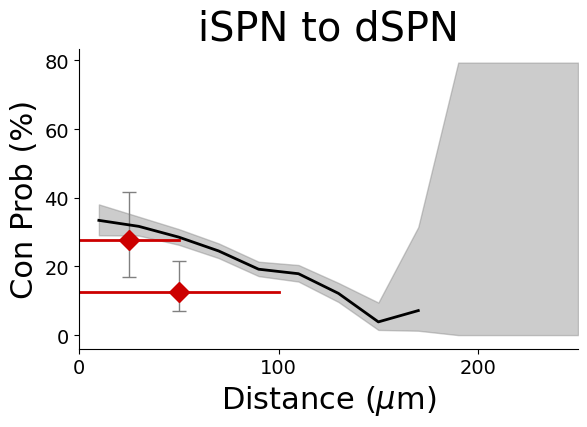

Wrote networks/simple_example/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-2D-dist.png


({5e-05: 0.3035536366655596, 0.0001: 0.25083563435547157},
 'networks/simple_example/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-2D-dist.png')

In [3]:
sa.plot_connection_probability("iSPN", "dSPN",
                                dist_3d=dist3D,
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data=[13 / 47.0, 10 / 80.0],
                                exp_data_detailed=[(13, 47), (10, 80)],
                                y_max=y_max_H)

Here we plot a histogram over the number of synapses between each pair of connected iSPN and dSPN.

Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 100/100
Calculating max synapses
Calculating mean synapses
Plotting 2173 connections


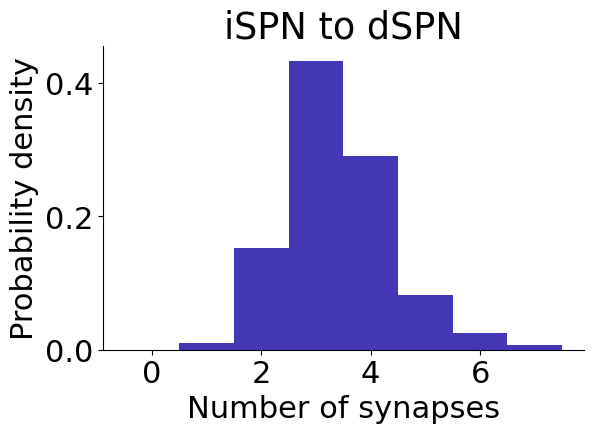

Wrote networks/simple_example/figures/Network-number-of-synapses-from-iSPN-to-dSPN-per-cell.png


In [4]:
sa.plot_num_synapses_per_pair("iSPN", "dSPN")